In [5]:
from main import (
    youtube_to_mp3,
    tag_mp3,
    make_fun_fact,
    get_upcoming_song,
    tts,
)
from mutagen.easyid3 import EasyID3
from mutagen.mp3 import MP3
from mutagen.id3 import ID3
import pathlib

from pathlib import Path
from openai import OpenAI

import os
import subprocess

# Get OPENAI key from .env file
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
prompt = get_prompt()
prompt

'Give me a playlist of [NUM_TRACKS] [GENRE] songs. [DESCRIPTION].\nReturn each song on a new line with this format: "Artist - Song Title - Year". Don\'t include any list numbering, just the information I asked for in the format I indicated.'

In [3]:
import json

# Read the json from genre_prompts.json
with open("genre_prompts.json", "r") as file:
    genre_prompts = json.loads(file.read())["genres"]

genre_prompt = genre_prompts[-1]
genre_prompt

{'tag': 'Aspen Vibes',
 'description': 'A curated blend of soft rock, adult contemporary, and melodic pop hits in English. Perfect for relaxed listening with a nostalgic touch — the signature sound of Aspen 102.3.'}

In [ ]:
playlist = gpt_playlist(prompt, genre_prompt["tag"], 15, genre_prompt["description"])
playlist

[Song(artist='Gareth Emery', title='Sansa', year='2016'),
 Song(artist='Gareth Emery', title='Long Way Home', year='2014'),
 Song(artist='Seven Lions', title='First Time (feat. Dylan Matthew)', year='2018'),
 Song(artist='Above & Beyond', title='Hello', year='2018'),
 Song(artist='Chicane', title='Saltwater', year='1999'),
 Song(artist='Lane 8', title='Road', year='2020'),
 Song(artist='Ilan Bluestone', title='43', year='2015'),
 Song(artist='Porter Robinson', title='Flicker', year='2014'),
 Song(artist='Eric Prydz', title='Generate', year='2015'),
 Song(artist='Cosmic Gate', title='Exploration of Space', year='2000'),
 Song(artist='Audien', title='Wayfarer', year='2013'),
 Song(artist='Andrew Bayer', title='Once Lydian', year='2019'),
 Song(artist='EDX', title="Roadkill (EDX's Ibiza Sunrise Remix)", year='2008'),
 Song(artist='Marcus Schossow', title='Reverie', year='2013'),
 Song(artist='Yotto', title='Song From The Sun', year='2019')]

In [6]:
len(playlist)

30

In [10]:
for song in playlist:
    artist, title = song.split(" - ")
    print(f"Processing song: {artist} - {title}")
    # song_path = f"songs/{song}.mp3"
    song_path = pathlib.Path("songs") / f"{song}.mp3"
    if not song_path.exists():
        youtube_to_mp3(song, str(song_path))
        tag_mp3(song_path, artist, title)
        print(f"Downloaded and tagged: {artist} - {title}")
    else:
        print(f"Song already exists: {artist} - {title}")

Processing song: Queen - Bohemian Rhapsody
Song already exists: Queen - Bohemian Rhapsody
Processing song: Led Zeppelin - Stairway to Heaven
Song already exists: Led Zeppelin - Stairway to Heaven
Processing song: The Rolling Stones - Sympathy for the Devil
Downloaded: songs/The Rolling Stones - Sympathy for the Devil.mp3
Downloaded and tagged: The Rolling Stones - Sympathy for the Devil
Processing song: The Who - Baba O'Riley
Song already exists: The Who - Baba O'Riley
Processing song: Pink Floyd - Comfortably Numb
Song already exists: Pink Floyd - Comfortably Numb
Processing song: Lynyrd Skynyrd - Free Bird
Downloaded: songs/Lynyrd Skynyrd - Free Bird.mp3
Downloaded and tagged: Lynyrd Skynyrd - Free Bird
Processing song: AC/DC - Back in Black
Downloaded: songs/AC/DC - Back in Black.mp3
Downloaded and tagged: AC/DC - Back in Black
Processing song: The Eagles - Hotel California
Song already exists: The Eagles - Hotel California
Processing song: Aerosmith - Dream On
Song already exists: 

## Fun Fact

In [3]:
now_playing, upcoming = get_upcoming_song()

print(upcoming["song"]["text"])

fun_fact = make_fun_fact(upcoming["song"]["artist"], upcoming["song"]["title"])
print(fun_fact)

Prince - When Doves Cry
¿Sabías que "When Doves Cry" de Prince no tiene bajo? ¡Ese toque único la llevó a la cima de las listas en 1984!


## ReplayGain metadata

In [ ]:
def apply_replaygain_to_folder(folder_path):
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(".mp3"):
                full_path = os.path.join(root, file)
                print(f"Applying ReplayGain to: {full_path}")
                try:
                    audio = MP3(full_path)
                    if "RVA2:track" in audio.tags:
                        print(f"ReplayGain already present for: {full_path}, skipping.")
                        continue
                    subprocess.run(["mp3gain", "-r", "-k", full_path], check=True)
                except subprocess.CalledProcessError as e:
                    print(f"Error processing {file}: {e}")


# Example usage
# apply_replaygain_to_folder("songs")

## Text to Speech snippets

In [6]:
neuralcast_snippets = [
    "Estás en NeuralCast: música elegida con inteligencia, pero pensada con cariño.",
    "Saluditos a Shaki, la novia bonita, y la reina de este pequeño universo radial. Gracias por la inspiración diaria.",
    "Esto no es Spotify. Esto es NeuralCast. Acá, cada tema tiene sentido.",
    "Si esta canción te mueve algo por dentro… misión cumplida.",
    "Desde el living de casa al rincón más sonoro de tu día. Esto es NeuralCast.",
    "Nuestra inteligencia artificial eligió esta canción, pero fue tu corazón el que la aprobó. Seguimos...",
    "¿Querías un algoritmo con gusto? Lo armamos en casa. Con auriculares y mate.",
    "Un abrazo radial a mi cómplice de todas las aventuras: Shaki. Esta también va para vos.",
    "¿Te suena? Bien. ¿No te suena? Mejor. Porque viniste a descubrir.",
    "NeuralCast: una radio local, para vos… y para nadie más.",
    "Bienvenidos a NeuralCast: donde las máquinas eligen, pero la emoción sigue siendo 100% humana.",
    "No somos una radio comercial, pero tenemos mejor gusto musical que muchas que sí lo son. Modestia aparte.",
    "Este tema suena bien porque fue elegido con inteligencia artificial... y porque vos estás del otro lado.",
    "Dicen que la música no se piensa, se siente. Bueno, nosotros hacemos ambas cosas. Bienvenidos a NeuralCast.",
    "Quizás no conozcas esta canción. Pero si te gusta, significa que estás exactamente donde tenías que estar.",
    "Shaki dice que a veces esta radio la hace llorar de emoción. Si eso no es un buen feedback, no sé qué lo es.",
    "Este es uno de esos momentos raros en que todo encaja: la canción, el ambiente, vos, nosotros...",
    "Transmitiendo desde un rincón del living, con café frío y mucho cariño. Esto es NeuralCast.",
    "Gracias por compartir este rato con nosotros. Aunque seamos solo bits y cables, se siente bastante humano.",
    "Oli... ¿todavía no estás durmiendo? Esta canción te la puse bajito, a ver si te ayuda con la siesta.",
    "Ey, Oli... prestá atención a este tema. Vas a crecer con buen gusto musical, lo prometo.",
    "Esta canción, Oli, algún día la vas a volver a escuchar y vas a sentir algo sin saber por qué. Es porque te la poníamos ahora.",
    "Oli, estás creciendo entre melodías. Que esta radio te acompañe mientras descubrís el mundo.",
    "Si estás despierto, Oli, esta va para vos. Y si estás dormido... mejor, porque papá por fin puede tomar un café caliente.",
    "Oli, no sabés leer esto todavía, pero te lo digo igual: este tema es un clásico. Confiá en papá.",
    "Estamos construyendo tus recuerdos sonoros, Oli. Y queremos que suenen bien.",
    "Oli, algún día vas a bailar con estas canciones… por ahora, con que no llores está bien.",
    "Esta canción tiene más años que vos, Oli. Pero tiene onda, como vos.",
    "Te estamos armando un soundtrack de vida, Oli. De a poquito, canción por canción.",
]

In [7]:
# Initialize OpenAI client
OPENAI_KEY = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=OPENAI_KEY)

for idx, snippet in enumerate(neuralcast_snippets):
    speech_file_path = Path("speeches") / f"Snippet_{idx}.mp3"

    with client.audio.speech.with_streaming_response.create(
        model="gpt-4o-mini-tts",
        voice="ash",
        input=snippet,
        instructions=instruction_prompt,
    ) as response:
        response.stream_to_file(speech_file_path)
    print(f"Generated speech for snippet {idx}: {speech_file_path}")

Generated speech for snippet 0: speeches/Snippet_0.mp3
Generated speech for snippet 1: speeches/Snippet_1.mp3
Generated speech for snippet 2: speeches/Snippet_2.mp3
Generated speech for snippet 3: speeches/Snippet_3.mp3
Generated speech for snippet 4: speeches/Snippet_4.mp3
Generated speech for snippet 5: speeches/Snippet_5.mp3
Generated speech for snippet 6: speeches/Snippet_6.mp3
Generated speech for snippet 7: speeches/Snippet_7.mp3
Generated speech for snippet 8: speeches/Snippet_8.mp3
Generated speech for snippet 9: speeches/Snippet_9.mp3
Generated speech for snippet 10: speeches/Snippet_10.mp3
Generated speech for snippet 11: speeches/Snippet_11.mp3
Generated speech for snippet 12: speeches/Snippet_12.mp3
Generated speech for snippet 13: speeches/Snippet_13.mp3
Generated speech for snippet 14: speeches/Snippet_14.mp3
Generated speech for snippet 15: speeches/Snippet_15.mp3
Generated speech for snippet 16: speeches/Snippet_16.mp3
Generated speech for snippet 17: speeches/Snippet_1

In [44]:
chill_melodic_house_intros = [
    "Se va apagando el día y nosotros bajamos un cambio. Tomate un respiro: arranca un segmento de chill melodic house, suavecito y prolijo, ideal para dejar que la noche te encuentre.",
    "El sol ya está fichando salida y el algoritmo se puso en pantuflas. Momento de calmar la cabeza: viene un set de melodic house tranqui, con melodías que te acarician las orejas.",
    "Si tu jornada fue un quilombo, quedate: ahora aflojamos los hombros. Subí el volumen bajito y dejate llevar por este chill melodic house que te ordena el pulso.",
    "Modo atardecer activado, che. Bajamos las luces, subimos los graves redonditos y nos metemos en un viaje de melodic house bien manso para cerrar el día como corresponde.",
    "Poné el agua del mate o estirá las piernas en el sillón: llega una tanda de house melódico, calmo y con onda, para que la cabeza baje a tierra sin apuro.",
    "Del apuro al disfrute en tres, dos, uno... Aterrizá con nosotros en territorio chill: beats prolijos, melodías cálidas y ese toque melódico que te baja un cambio posta.",
    "Si venís volviendo en bondi o ya estás en casa, este es el abrazo sonoro que necesitabas. Melodic house tranqui, respiración lenta y la noche entrando por la ventana.",
    "Abróchense los auriculares que la turbulencia se terminó. Aterrizamos suave con un segmento de house melódico: simple, limpio, y con groove para relajar el bocho.",
    "Hoy te debo un recreo. Aflojá la mandíbula, soltá los pensamientos y quedate con estas melodías de chill melodic house, hechas para acompañar el cierre sin dramas.",
    "Checklist de fin de día: respiración, lucecitas bajas, sonrisa. Lo demás lo pone este set de melodic house chill, que te mece la noche con elegancia y humor.",
]

chill_melodic_house_intros

['Se va apagando el día y nosotros bajamos un cambio. Tomate un respiro: arranca un segmento de chill melodic house, suavecito y prolijo, ideal para dejar que la noche te encuentre.',
 'El sol ya está fichando salida y el algoritmo se puso en pantuflas. Momento de calmar la cabeza: viene un set de melodic house tranqui, con melodías que te acarician las orejas.',
 'Si tu jornada fue un quilombo, quedate: ahora aflojamos los hombros. Subí el volumen bajito y dejate llevar por este chill melodic house que te ordena el pulso.',
 'Modo atardecer activado, che. Bajamos las luces, subimos los graves redonditos y nos metemos en un viaje de melodic house bien manso para cerrar el día como corresponde.',
 'Poné el agua del mate o estirá las piernas en el sillón: llega una tanda de house melódico, calmo y con onda, para que la cabeza baje a tierra sin apuro.',
 'Del apuro al disfrute en tres, dos, uno... Aterrizá con nosotros en territorio chill: beats prolijos, melodías cálidas y ese toque meló

In [45]:
for snippet in chill_melodic_house_intros:
    tts(
        text=snippet,
        output_path="speeches/chill_melodic_house",
        file_name=f"Chill_Melodic_House_Intro_{chill_melodic_house_intros.index(snippet)}.mp3",
        instruction_prompt=instruction_prompt,
    )

Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_0.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_1.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_2.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_3.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_4.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_5.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_6.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_7.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_8.mp3
Generated speech: speeches/chill_melodic_house/Chill_Melodic_House_Intro_9.mp3


## NeuralForge intro

In [11]:
neuralforge_into = "Estas escuchando a NeuralForge [pronunciado en ingles]. El hermano metalero de NeuralCast. Sigamos rockeando juntos."

tts(
    text=neuralforge_into,
    outfile="NeuralForge/songs/intros/NeuralForge_Intro2.mp3",
)

## Test Song Validation

In [8]:
from validators import spotify_ok, mb_ok, itunes_ok, verified

# Example test cases
artist = "Meta Guacha"
title = "La Cumbia de los Trapos"

print("Spotify OK:", spotify_ok(artist, title))
print("MusicBrainz OK:", mb_ok(artist, title))
print("iTunes OK:", itunes_ok(artist, title))
print("Any verified:", verified(artist, title))

Spotify OK: True
MusicBrainz OK: False
iTunes OK: False
Any verified: True


## Test album validation

In [3]:
from validators import validate_album_field

validate_album_field("Seventh Wonder", "The Great Escape", "The Great Escape")

{'provided': True,
 'validated': True,
 'message': 'Album validated by Spotify, Musicbrainz'}

In [5]:
# Test examples
validate_album_field("Sonata Arctica", "The Great Escape", "Tiara")

{'provided': True,
 'validated': False,
 'message': 'Album not validated by any provider'}

In [7]:
# Mixed positive/negative test cases: (artist, title, album, expected_result)
tests = [
    ("Seventh Wonder", "The Great Escape", "The Great Escape", True),
    ("Seventh Wonder", "The Great Escape", "Become", False),
    ("Metallica", "Enter Sandman", "Metallica", True),
    ("Metallica", "Enter Sandman", "Ride the Lightning", False),
    ("Arch Enemy", "War Eternal", "War Eternal", True),
    ("Arch Enemy", "War Eternal", "Nemesis", False),
    ("Crepuscle", "In the Winds of Glory", "Heavenly Skies", True),
    ("Crepuscle", "In the Winds of Glory", "Lament", False),
]

passed = 0
failed = 0

for artist, title, album, expected in tests:
    try:
        result = validate_album_field(artist, title, album)
        ok = result["validated"]
    except Exception as e:
        result = e
        ok = False

    is_pass = ok == expected
    status = "PASS" if is_pass else "FAIL"
    print(
        f"{status} | Artist='{artist}' | Title='{title}' | Album='{album}' | expected={expected} | got={result}"
    )

    if is_pass:
        passed += 1
    else:
        failed += 1

print(f"Summary: {passed} passed, {failed} failed")

if failed:
    raise AssertionError(f"{failed} validate_album_field tests failed")

PASS | Artist='Seventh Wonder' | Title='The Great Escape' | Album='The Great Escape' | expected=True | got={'provided': True, 'validated': True, 'message': 'Album validated by Spotify, Musicbrainz'}
PASS | Artist='Seventh Wonder' | Title='The Great Escape' | Album='Become' | expected=False | got={'provided': True, 'validated': False, 'message': 'Album not validated by any provider'}
PASS | Artist='Metallica' | Title='Enter Sandman' | Album='Metallica' | expected=True | got={'provided': True, 'validated': True, 'message': 'Album validated by Musicbrainz, Itunes'}
PASS | Artist='Metallica' | Title='Enter Sandman' | Album='Ride the Lightning' | expected=False | got={'provided': True, 'validated': False, 'message': 'Album not validated by any provider'}
PASS | Artist='Arch Enemy' | Title='War Eternal' | Album='War Eternal' | expected=True | got={'provided': True, 'validated': True, 'message': 'Album validated by Spotify, Musicbrainz, Itunes'}
PASS | Artist='Arch Enemy' | Title='War Eternal

## Playlists

In [3]:
import pandas as pd

# Load the CSV file
classic_rock_path = pathlib.Path("playlists") / "ClassicRock.csv"
classic_rock_df = pd.read_csv(classic_rock_path)

# Check for duplicates
duplicates = classic_rock_df[classic_rock_df.duplicated()]
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicates found.")

# Remove duplicates, keeping the first occurrence
classic_rock_df = classic_rock_df.drop_duplicates()

# Sort by Artist name (assuming the column is named 'Artist')
classic_rock_df = classic_rock_df.sort_values(by="Artist")
classic_rock_df

No duplicates found.


,Artist,Title,Year
125,AC/DC,Stiff Upper Lip,2000
70,AC/DC,Back in Black,1980
55,AC/DC,Highway to Hell,1979
60,Aerosmith,Walk This Way,1975
76,Aerosmith,Dude (Looks Like a Lady),1987
...,...,...,...
174,U2,Sunday Bloody Sunday,1983
64,Van Halen,Runnin' with the Devil,1978
8,Vanilla Fudge,You Keep Me Hangin' On,1967
117,Weezer,Say It Ain't So,1994


In [4]:
# Save the cleaned and sorted dataframe back to CSV
classic_rock_df.to_csv(classic_rock_path, index=False)

## Album artwork download

In [53]:
from album_art import embed_from_artist_album, show_embedded_art

In [60]:
mp3 = "NeuralForge/songs/Prog Metal/Seventh Wonder - Alley Cat.mp3"

[show] Loading ID3 from: NeuralForge/songs/Prog Metal/Seventh Wonder - Alley Cat.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/png
[show] Displaying image (format=png, fixed width=400)...


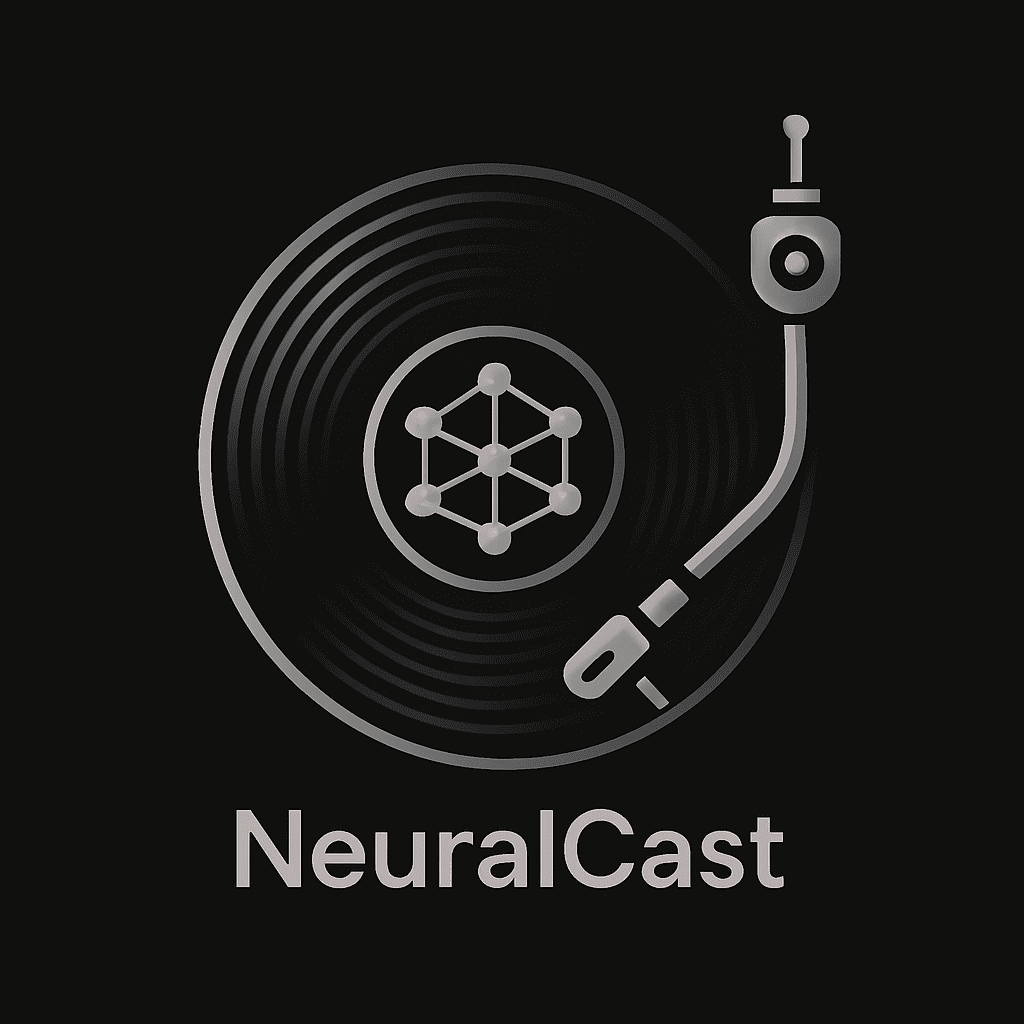

Saved embedded art to: /tmp/tmpw5uwjv9a.png


'image/png'

In [61]:
show_embedded_art(mp3)

In [64]:
embed_from_artist_album(mp3, "Seventh Wonder", "Tiara")

Searching for album 'Tiara' by 'Seventh Wonder' on MusicBrainz...
-> Found release: 'Become' (ID: df8e4f8f-5bb3-40fa-9cf6-a3af9694b32b)
-> Successfully downloaded cover art from https://coverartarchive.org/release/df8e4f8f-5bb3-40fa-9cf6-a3af9694b32b/front
-> Successfully embedded artwork into 'NeuralForge/songs/Prog Metal/Seventh Wonder - Alley Cat.mp3' (Release: 'Become')


[show] Loading ID3 from: NeuralForge/songs/Prog Metal/Seventh Wonder - Alley Cat.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/jpeg
[show] Displaying image (format=jpeg, fixed width=400)...


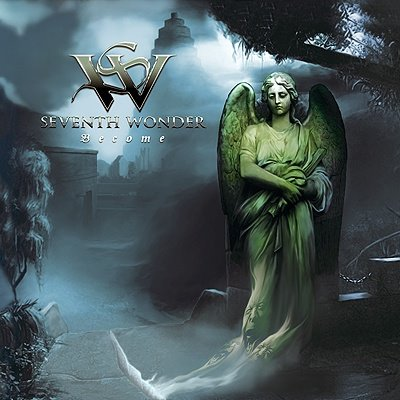

Saved embedded art to: /tmp/tmp4xfv5u2l.jpeg


'image/jpeg'

In [65]:
show_embedded_art(mp3)